In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca data dari file CSV dengan pemisah titik koma (;)
sales_v1 = pd.read_csv('csv/fact_sales_v1.csv', sep=';')
display(sales_v1.shape)

# Membuat salinan dari DataFrame untuk menghindari perubahan pada data asli
df_line = sales_v1.copy(deep=True)  

# Menghapus baris yang memiliki 'order_item_type' dengan nilai 'shipping', karena tidak termasuk dalam analisis penjualan produk
df_line = df_line[df_line['order_item_type'] != 'shipping']

# Mengonversi kolom 'order_date' ke format datetime agar dapat digunakan dalam analisis waktu
df_line['order_date'] = pd.to_datetime(df_line['order_date'])

# Memilih hanya kolom yang relevan dan menghapus duplikasi untuk memastikan setiap transaksi unik
df_line = df_line[['order_date', 'ip_address', 'order_id']].drop_duplicates()

# Bulatkan waktu ke jam terdekat
df_line['order_date'] = df_line['order_date'].dt.floor('h')
display(df_line.head())
display(df_line.shape)

# Grouping
df_line = df_line.groupby(['order_date', 'ip_address']).size().reset_index(name='jumlah_transaksi')
display(df_line.head(14))
df_line.shape

(752, 14)

,order_date,ip_address,order_id
0,2025-05-08 22:00:00,118.99.118.196,1036
2,2025-05-08 22:00:00,118.99.118.196,1037
4,2025-05-08 22:00:00,118.99.118.196,1038
6,2025-05-08 22:00:00,118.99.118.196,1039
8,2025-05-08 23:00:00,118.99.118.196,1040


(110, 3)

,order_date,ip_address,jumlah_transaksi
0,2025-05-08 22:00:00,118.99.118.196,4
1,2025-05-08 23:00:00,118.99.118.196,8
2,2025-05-09 14:00:00,114.10.137.72,12
3,2025-05-09 15:00:00,118.99.64.211,12
4,2025-05-09 16:00:00,180.242.232.29,8
5,2025-05-09 17:00:00,103.3.221.19,5
6,2025-05-09 17:00:00,180.242.232.29,3
7,2025-05-10 04:00:00,103.154.110.177,11
8,2025-05-10 05:00:00,180.243.107.39,1
9,2025-05-10 06:00:00,180.242.235.124,12


(14, 3)

In [33]:
# Deploy
# df_line.to_csv('line_chart.csv', index=False)
# df = pd.read_csv('line_chart.csv')

9

In [28]:
# Pivot agar IP Address menjadi kolom
pivot_df = df_line.pivot(index='order_date', columns='ip_address', values='jumlah_transaksi').fillna(0)
pivot_df.head()

ip_address,103.154.110.177,103.3.221.19,114.10.137.72,118.99.118.196,118.99.64.211,180.242.232.29,180.242.235.124,180.243.107.39,180.248.184.92
order_date,,,,,,,,,
2025-05-08 22:00:00,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
2025-05-08 23:00:00,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0
2025-05-09 14:00:00,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0
2025-05-09 15:00:00,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0
2025-05-09 16:00:00,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0


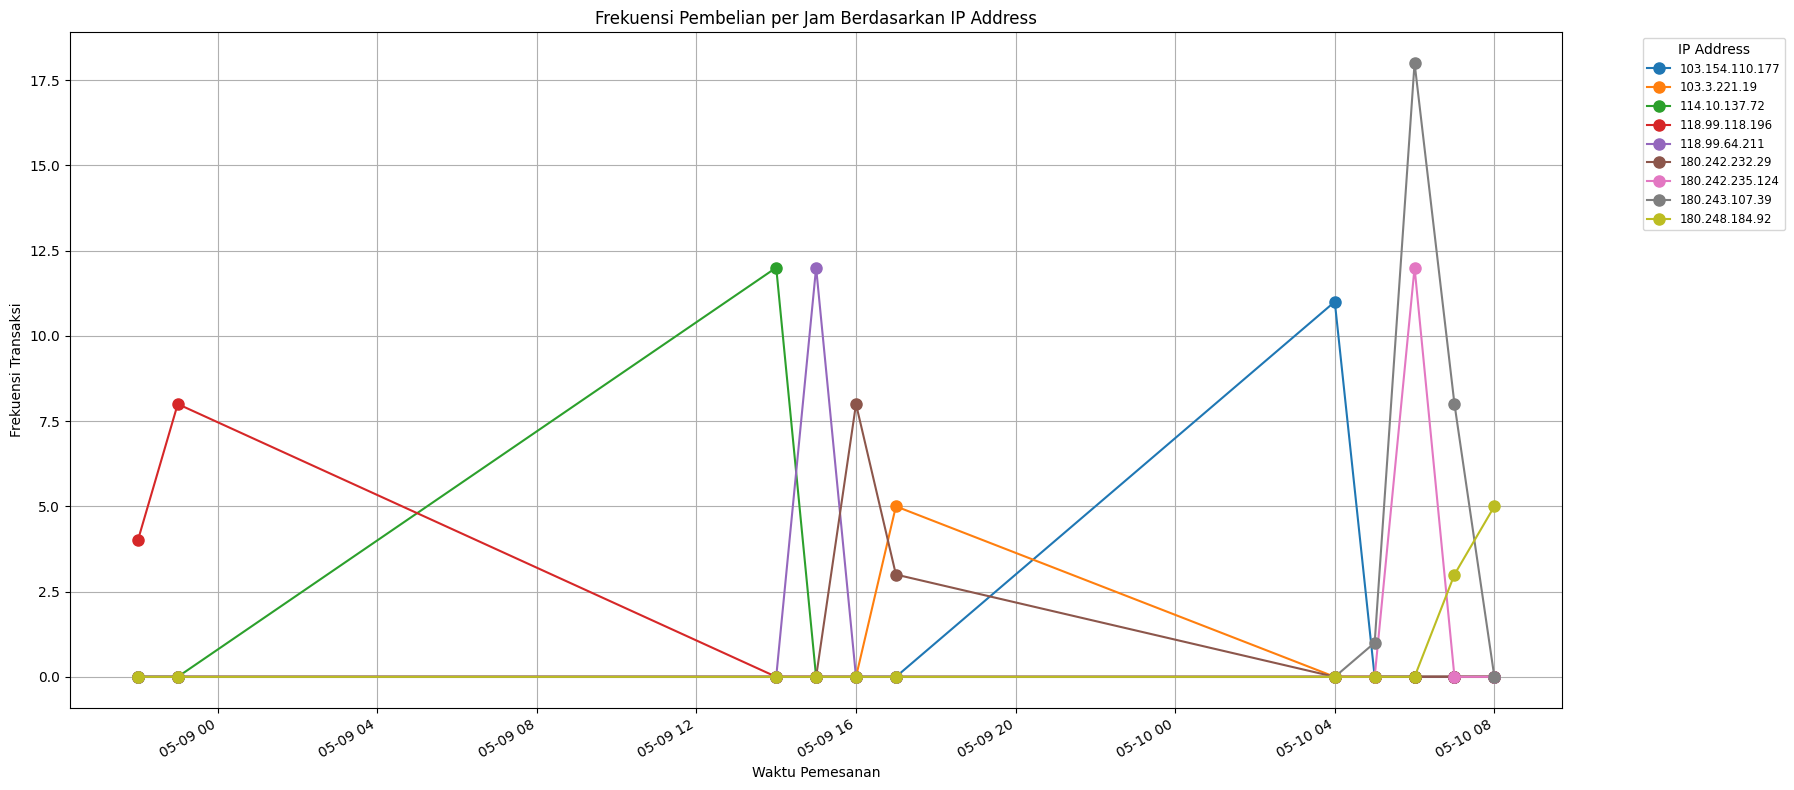

In [36]:
# Plotting
fig, ax = plt.subplots(figsize=(18, 8))
pivot_df.plot(ax=ax, marker='o', markersize=8, linewidth=1.5)
ax.set_title('Frekuensi Pembelian per Jam Berdasarkan IP Address')
ax.set_xlabel('Waktu Pemesanan')
ax.set_ylabel('Frekuensi Transaksi')
ax.legend(title='IP Address', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
ax.grid(True)
plt.tight_layout()